## Problem:
#### Accounts that contain Patient Protected Information (PPI) are highly susceptible to breaches, as they contain much more information about a person than any other targets for hackers (credit card information, bank information, etc.). These are also known as HIPAA breaches.
* A hot topic for discussion in the healthcare industry for the past few years has been the hacking of Electronic Medical Records (EMR) and the siginificant economic costs associated with these types of breaches
* Hypotheses: (1) Number of breaches would be directly correlated with the number of affected individuals (2) EMR would be the most targeted location of information (3) Largest fines would be associated with the most breaches/most people affected by a breach

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd

In [9]:
breach_df = pd.read_excel("Breach_Report.xlsx")
fines_df = pd.read_excel("HIPAA_Breach_Settlements.xlsx")

In [10]:
fines_df["Fine Total"] = fines_df["Fine Total"].astype(int)
fines_df['Date'] = pd.to_datetime(fines_df['Date'])
breach_df['Breach Submission Date'] = pd.to_datetime(breach_df['Breach Submission Date'])

In [11]:
fines_df.set_index("Date", inplace=True)

In [12]:
breach_df.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Covered Entity Code', 'Individuals Affected', 'Breach Submission Date',
       'Type of Breach', 'Type of Breach Code', 'Location of Breach',
       'Location of Breach Code', 'Business Associate Present',
       'Business Associate Code', 'Web Description'],
      dtype='object')

In [61]:
breach_df['Year'] = pd.DatetimeIndex(breach_df['Breach Submission Date']).year

In [14]:
breach_df.head(1)

,Name of Covered Entity,State,Covered Entity Type,Covered Entity Code,Individuals Affected,Breach Submission Date,Type of Breach,Type of Breach Code,Location of Breach,Location of Breach Code,Business Associate Present,Business Associate Code,Web Description,Year
0,"Inspira Behavioral Care, Corp",NaN,Healthcare Provider,1.0,4246.0,2019-05-02,Theft,1.0,Desktop Computer,5.0,No,0,"Inspira Behavioral Care, Corp., the covered en...",2019


### Hypothesis 1: HIPAA breaches would likely be directly correlated with the number of individuals affected by those breaches - FALSE
* The number of HIPAA breach reports is clearly increasing over time, yet the number of affected individuals has almost no trend at all
* Each subsequent category breakdown shows that there is no correlation whatsoever

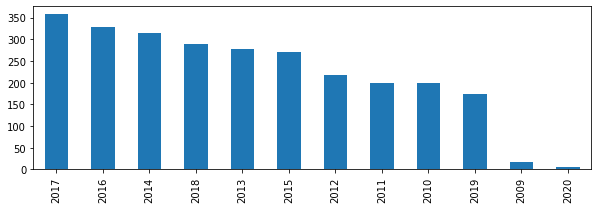

In [62]:
breach_df['Year'].value_counts().plot(kind='bar', figsize=(10,3))

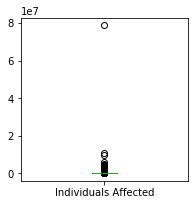

In [74]:
breach_df['Individuals Affected'].plot(kind='box', figsize=(3,3))

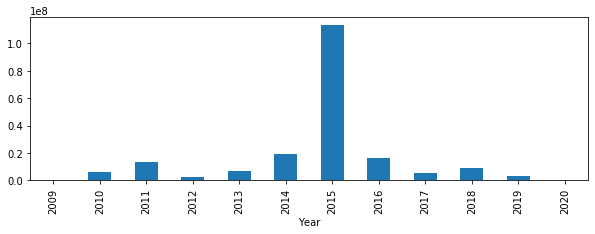

In [76]:
breach_df.groupby(['Year'])['Individuals Affected'].sum().plot(kind='bar', figsize=(10,3))

### No correlation between the number of breaches and affected people when compared by Covered Entity
* Healthcare Providers are the most prominent entity breached, about 2000 reports since 2009 affecting 50M people
* There have only been 400 Health Plan breaches since 2009, yet almost 200M people have been affected

In [17]:
breach_df.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Covered Entity Code', 'Individuals Affected', 'Breach Submission Date',
       'Type of Breach', 'Type of Breach Code', 'Location of Breach',
       'Location of Breach Code', 'Business Associate Present',
       'Business Associate Code', 'Web Description', 'Year'],
      dtype='object')

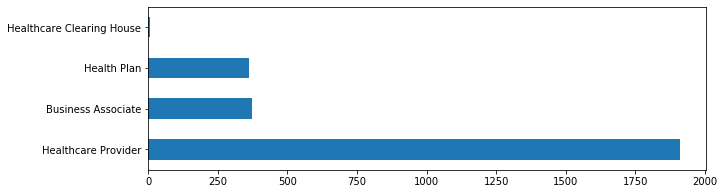

In [18]:
breach_df['Covered Entity Type'].value_counts().plot(kind='barh',figsize=(10,3))

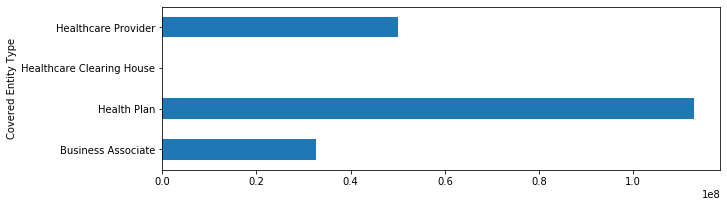

In [78]:
breach_df.groupby(['Covered Entity Type'])['Individuals Affected'].sum().plot(kind='barh', figsize=(10,3))

### No correlation between the number of breaches and affected people when compared by State
* CA, TX, and FL show significant outliers in regards to the number of HIPAA breach reports filed
* When looking at the number of inidividuals affected: IN far surpasses any state, by millions
* This is all due to a single Health Plan breach

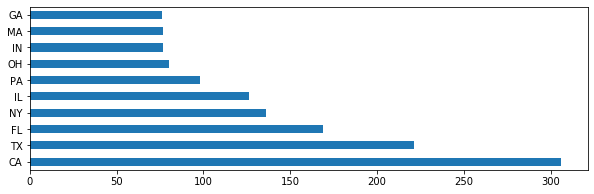

In [20]:
breach_df['State'].value_counts()[:10].plot(kind='barh',figsize=(10,3))

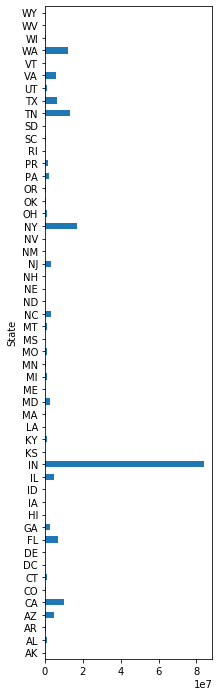

In [23]:
breach_df.groupby(['State'])['Individuals Affected'].sum().plot(kind='barh', figsize=(3,12))

### No correlation between the number of breaches and affected people when compared by Breach Type
* Hacking/IT incident is the third most common type of breach, Theft being the most common
* One Hacking/IT incident, of a Network Server, of a Health Plan resulted in over 100M people affected

In [24]:
breach_df.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Covered Entity Code', 'Individuals Affected', 'Breach Submission Date',
       'Type of Breach', 'Type of Breach Code', 'Location of Breach',
       'Location of Breach Code', 'Business Associate Present',
       'Business Associate Code', 'Web Description', 'Year'],
      dtype='object')

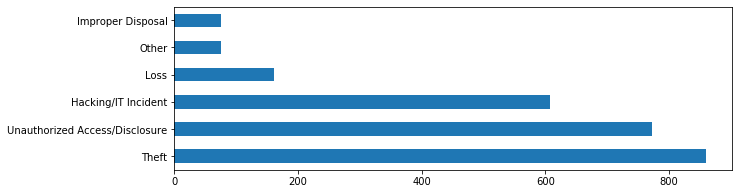

In [25]:
breach_df['Type of Breach'].value_counts()[:6].plot(kind='barh',figsize=(10,3))

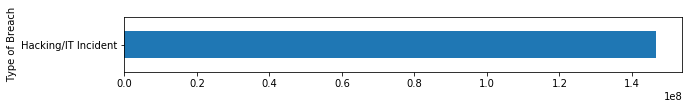

In [26]:
breach_df.groupby(['Type of Breach'])['Individuals Affected'].sum()[:1].plot(kind='barh', figsize=(10,1))

### Hypothesis 2: EMR will be most targeted location - FALSE
* First glances at the breach data show that of major HIPAA breach locations, EMR breaches are actually the least common target
* Note that Network Server breaches are second most common location of housed PPI

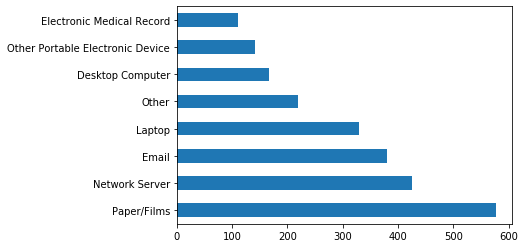

In [27]:
breach_df['Location of Breach'].value_counts()[:8].plot(kind='barh')

### Hypothesis 3: Largest fines will directly correlate with the most people affected by breach - TRUE
* 2016 saw the most HIPPA cases settled with various fines, but these settles breaches did not affect the most people
* 2018 saw the highest costs associated with fines (when 2015 HIPAA Health Plan breach was settled)

In [54]:
fines_df.columns

Index(['Year', 'Organization', 'Fine Total', 'Link to OCR Settlement'], dtype='object')

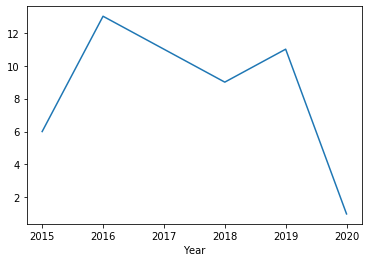

In [52]:
fines_df.groupby(['Year'])['Fine Total'].count().plot(kind='line')

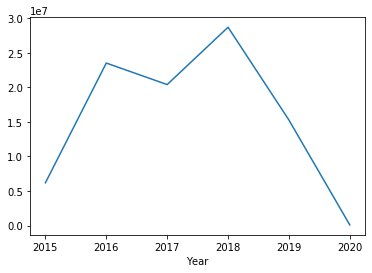

In [51]:
fines_df.groupby(['Year'])['Fine Total'].sum().plot(kind='line')

### Conclusion
* Preventative hacking measures need to be directed at protecting network serves, first and foremost 
* Hacking/IT incidents are the most detrimental, which makes sense with our technology-driven society
* Health Plans house incredible amounts of PPI, one breach here and millions of lives are affected. Number of breaches, location of breaches, and tpyes of breaches do not matter at all if we cannot protect Health Plan Network Servers